In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_dir = '/content/drive/MyDrive/logikaui-ml-intro/assets/woman.jpeg'

# Convolution & Pool

## Math of Convolution



In [ ]:
%matplotlib inline 

# visualization tool
import matplotlib
import matplotlib.pyplot as plt

# computational lib
import numpy as np

# image processing
from skimage import io, color, feature, measure, filters
from skimage.measure import block_reduce as pool2d

from scipy import signal

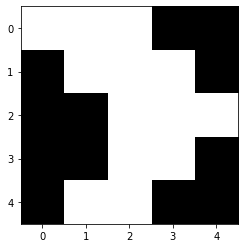

In [ ]:
image = np.array([
    [1,1,1,0,0],
    [0,1,1,1,0],
    [0,0,1,1,1],
    [0,0,1,1,0],
    [0,1,1,0,0]
])

plt.imshow(image, cmap='gray')

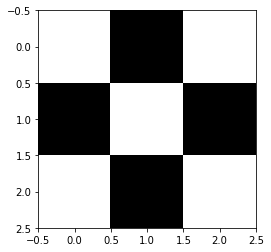

In [ ]:
kernel = np.array([
    [1,0,1],
    [0,1,0],
    [1,0,1],
])

plt.imshow(kernel, cmap='gray')

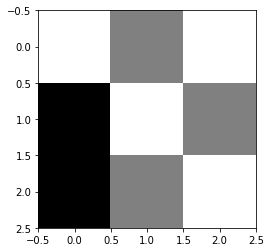

In [ ]:
# convolution operation
conv2d = signal.convolve2d(image, kernel, mode='valid')
plt.imshow(conv2d, cmap='gray')

In [ ]:
print(conv2d)

[[4 3 4]
 [2 4 3]
 [2 3 4]]


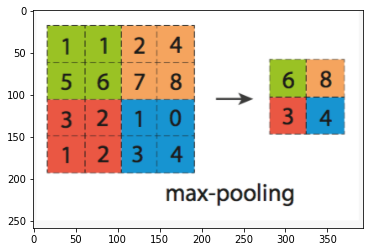

In [ ]:
img = io.imread(base_dir + 'assets/max_pooling.png')
plt.imshow(img, cmap='gray')

In [ ]:
image = np.array([
    [1,1,2,4],
    [5,6,7,8],
    [3,2,1,0],
    [1,2,3,4]
])
pkernel = (2,2)
pool = pool2d(image, pkernel, np.max)
print(pool)

[[6 8]
 [3 4]]


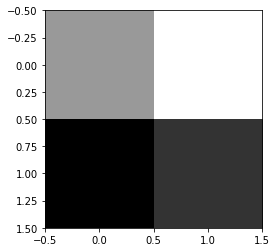

In [ ]:
plt.imshow(pool, cmap='gray')

## Yuk cari contoh kasus Dari gambar beneran

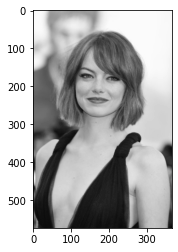

In [ ]:
img = io.imread(base_dir)
gray = color.rgb2gray(img)
plt.imshow(gray, cmap='gray')

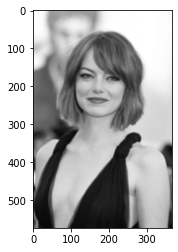

In [ ]:
sb = filters.gaussian(gray)
plt.imshow(sb, cmap='gray')

In [ ]:
edge = np.array([
    [1,0,-1],
    [1,0,-1],
    [1,0,-1]
])

laplacian = np.array([
    [ 0, -1,  0],
    [-1,  4, -1],
    [ 0, -1,  0]
])

sobel = np.array([
    [1,0,-1],
    [2,0,-2],
    [1,0,-1]
])

scharr = np.array([
    [ 3, 0,  -3],
    [10, 0, -10],
    [ 3, 0,  -3]
])

gaussian = np.array([
    [1/16, 1/8, 1/16],
    [1/8,  1/4, 1/8],
    [1/16, 1/8, 1/16]
])

kernel = np.array([
    [1,0,1],
    [0,1,0],
    [1,0,1],
])

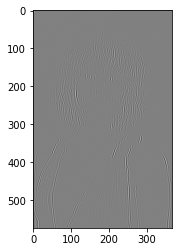

In [ ]:
# convolution operation
conv2d = signal.convolve2d(gray, sobel, boundary='symm', mode='same')
conv2d = signal.convolve2d(conv2d, sobel, boundary='symm', mode='same')
conv2d = signal.convolve2d(conv2d, sobel, boundary='symm', mode='same')
conv2d = signal.convolve2d(conv2d, sobel, boundary='symm', mode='same')
conv2d = signal.convolve2d(conv2d, sobel, boundary='symm', mode='same')
conv2d = signal.convolve2d(conv2d, sobel, boundary='symm', mode='same')


plt.imshow(conv2d, cmap='gray')

[[3.37897004e-01 3.40959371e-01 3.37808434e-01 ... 2.37159573e-04
  1.30151105e-03 1.25800674e-03]
 [3.38308939e-01 3.40722584e-01 3.37858907e-01 ... 7.14133256e-04
  7.88071211e-04 1.35445486e-03]
 [3.35526345e-01 3.30454518e-01 3.40141010e-01 ... 4.71672211e-04
  4.36228414e-04 5.81337968e-04]
 ...
 [4.11947176e-03 4.11946395e-03 2.39457757e-03 ... 8.53906587e-03
  7.53239357e-03 1.01309253e-02]
 [4.67709526e-03 2.67454575e-03 1.60981974e-03 ... 7.20697464e-03
  8.54640420e-03 1.06809091e-02]
 [5.37388001e-03 4.37360252e-03 2.45217842e-03 ... 7.10133334e-03
  9.84813512e-03 1.11733573e-02]]


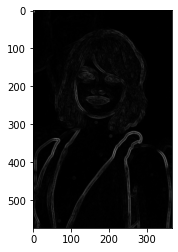

In [ ]:
# convolution operation

gg = color.rgb2gray(img)
conv2d = filters.sobel(gg)
conv2d = filters.sobel(conv2d)
conv2d = filters.sobel(conv2d)


plt.imshow(conv2d, cmap='gray')
print(conv2d)

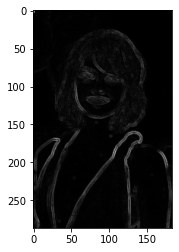

In [ ]:
# pool operation
kernel = (2,2)
pool = pool2d(conv2d, kernel, np.max)
plt.imshow(pool, cmap='gray')

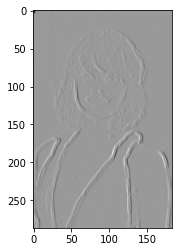

In [ ]:
kernel = np.array([
    [1,0,-1],
    [1,0,-1],
    [1,0,-1],
])

conv2d = signal.convolve2d(pool, kernel, boundary='symm', mode='same')
plt.imshow(conv2d, cmap='gray')

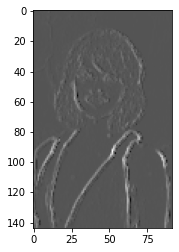

In [ ]:
kernel = (2,2)
pool = pool2d(conv2d, kernel, np.max)
plt.imshow(pool, cmap='gray')

# Studi Kasus

1. Buatlah `filter` untuk mendeteksi tepi dari gambar `woman.jpeg`. Lakukan resizing, transform, gray-scaling jika diperlukan!